In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import warnings
import plotly.graph_objs as go
import colorlover as cl
from IPython.display import HTML
from IPython.display import display
import chart_studio.plotly as py
from plotly import tools
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from itertools import cycle
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
#from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score, auc, roc_auc_score, confusion_matrix, log_loss, precision_score,recall_score

import cufflinks as cf
cf.go_offline() #will make cufflinks offline
cf.set_config_file(offline=False, world_readable=True)
from plotly.offline import iplot

bupu = cl.scales['9']['seq']['BuPu']
HTML( cl.to_html(bupu))

warnings.filterwarnings("ignore") 

### 1.Loading the Vehicle data

In [3]:
veh_data0521 = pd.read_csv("data/veh_data_0521.csv")

In [4]:
veh_data0521.shape

(3346442, 23)

In [5]:
veh_data0521.head()

,accident_index,age_band_of_driver,age_of_vehicle,driver_home_area_type,driver_imd_decile,engine_capacity_cc,hit_object_in_carriageway,hit_object_off_carriageway,journey_purpose_of_driver,junction_location,...,skidding_and_overturning,towing_and_articulation,vehicle_leaving_carriageway,vehicle_location_restricted_lane,vehicle_manoeuvre,vehicle_reference,vehicle_type,vehicle_left_hand_drive,first_point_of_impact,accident_year
0,200501BS00002,7,3.0,-1,-1,8268.0,0,0,1,3,...,0,0,0,0,4,1,11,2,4,2005
1,200501BS00003,6,5.0,1,3,8300.0,4,0,1,0,...,0,0,0,0,17,1,11,2,4,2005
2,200501BS00004,8,4.0,1,1,1769.0,0,0,6,0,...,0,0,0,0,18,1,9,2,1,2005
3,200501BS00005,8,10.0,-1,-1,85.0,10,0,6,0,...,1,0,0,0,18,1,3,2,1,2005
4,200501BS00006,8,1.0,1,4,2976.0,0,0,6,0,...,0,0,0,0,5,1,9,2,0,2005


## Loading the Casulties data

In [6]:
cas_data0521 = pd.read_csv("data/cas_data_0521.csv")

In [7]:
cas_data0521.shape

(3126645, 16)

In [8]:
cas_data0521.head()

,accident_index,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,accident_year
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1,2005
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1,2005
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1,2005
3,200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1,2005
4,200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1,2005


## Merging the vehicle and csulities data 

In [9]:
updated_veh_cas_0521 = pd.merge(veh_data0521, cas_data0521, how='inner',
                  left_on=['vehicle_reference', 'accident_index','accident_year'],
                  right_on=['vehicle_reference', 'accident_index','accident_year'])
 

In [10]:
updated_veh_cas_0521.shape

(2090929, 36)

In [11]:
updated_veh_cas_0521.head()

,accident_index,age_band_of_driver,age_of_vehicle,driver_home_area_type,driver_imd_decile,engine_capacity_cc,hit_object_in_carriageway,hit_object_off_carriageway,journey_purpose_of_driver,junction_location,...,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type
0,200501BS00002,7,3.0,-1,-1,8268.0,0,0,1,3,...,37,7,3,0,0,0,4,-1,11,1
1,200501BS00004,8,4.0,1,1,1769.0,0,0,6,0,...,30,6,3,5,2,0,0,-1,0,1
2,200501BS00005,8,10.0,-1,-1,85.0,10,0,6,0,...,49,8,3,0,0,0,0,-1,3,-1
3,200501BS00006,6,2.0,1,2,124.0,0,0,6,0,...,30,6,3,0,0,0,0,-1,3,1
4,200501BS00007,6,NaN,-1,-1,NaN,4,0,6,1,...,31,6,3,0,0,0,0,-1,3,-1


In [12]:
updated_veh_cas_0521.columns

Index(['accident_index', 'age_band_of_driver', 'age_of_vehicle',
       'driver_home_area_type', 'driver_imd_decile', 'engine_capacity_cc',
       'hit_object_in_carriageway', 'hit_object_off_carriageway',
       'journey_purpose_of_driver', 'junction_location', 'generic_make_model',
       'propulsion_code', 'sex_of_driver', 'skidding_and_overturning',
       'towing_and_articulation', 'vehicle_leaving_carriageway',
       'vehicle_location_restricted_lane', 'vehicle_manoeuvre',
       'vehicle_reference', 'vehicle_type', 'vehicle_left_hand_drive',
       'first_point_of_impact', 'accident_year', 'casualty_reference',
       'casualty_class', 'sex_of_casualty', 'age_of_casualty',
       'age_band_of_casualty', 'casualty_severity', 'pedestrian_location',
       'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type'],
      dtype='object')

## check for missing values

In [13]:
updated_veh_cas_0521.isnull().sum()

accident_index                             0
age_band_of_driver                         0
age_of_vehicle                        169434
driver_home_area_type                      0
driver_imd_decile                          0
engine_capacity_cc                    112355
hit_object_in_carriageway                  0
hit_object_off_carriageway                 0
journey_purpose_of_driver                  0
junction_location                          0
generic_make_model                    162124
propulsion_code                        99592
sex_of_driver                              0
skidding_and_overturning                   0
towing_and_articulation                    0
vehicle_leaving_carriageway                0
vehicle_location_restricted_lane           0
vehicle_manoeuvre                          0
vehicle_reference                          0
vehicle_type                               0
vehicle_left_hand_drive                    0
first_point_of_impact                      0
accident_y

In [14]:
#deleting columns with missing values
updated_veh_cas_0521.drop(["age_of_vehicle","engine_capacity_cc","generic_make_model","propulsion_code"], axis=1, inplace=True)

In [15]:
updated_veh_cas_0521.shape

(2090929, 32)

In [16]:
updated_veh_cas_0521.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090929 entries, 0 to 2090928
Data columns (total 32 columns):
 #   Column                              Dtype 
---  ------                              ----- 
 0   accident_index                      object
 1   age_band_of_driver                  int64 
 2   driver_home_area_type               int64 
 3   driver_imd_decile                   int64 
 4   hit_object_in_carriageway           int64 
 5   hit_object_off_carriageway          int64 
 6   journey_purpose_of_driver           int64 
 7   junction_location                   int64 
 8   sex_of_driver                       int64 
 9   skidding_and_overturning            int64 
 10  towing_and_articulation             int64 
 11  vehicle_leaving_carriageway         int64 
 12  vehicle_location_restricted_lane    int64 
 13  vehicle_manoeuvre                   int64 
 14  vehicle_reference                   int64 
 15  vehicle_type                        int64 
 16  vehicle_left_hand_

In [17]:
updated_veh_cas_0521.describe()

,age_band_of_driver,driver_home_area_type,driver_imd_decile,hit_object_in_carriageway,hit_object_off_carriageway,journey_purpose_of_driver,junction_location,sex_of_driver,skidding_and_overturning,towing_and_articulation,...,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type
count,2.090929e+06,2.090929e+06,2.090929e+06,2.090929e+06,2.090929e+06,2.090929e+06,2.090929e+06,2.090929e+06,2.090929e+06,2.090929e+06,...,2.090929e+06,2.090929e+06,2.090929e+06,2.090929e+06,2.090929e+06,2.090929e+06,2.090929e+06,2.090929e+06,2.090929e+06,2.090929e+06
mean,6.558362e+00,1.082946e+00,4.089213e+00,1.351158e+00,1.725134e+00,4.640229e+00,2.390515e+00,1.351536e+00,4.075786e-01,5.311276e-02,...,3.627083e+01,6.256367e+00,2.849165e+00,6.800284e-01,4.957519e-01,2.774551e-01,1.063207e-01,-2.564798e-01,7.813431e+00,1.039254e+00
std,2.207964e+00,9.689236e-01,3.478543e+00,9.511083e+00,9.428489e+00,2.064526e+00,3.161294e+00,5.084072e-01,1.256958e+00,6.227776e-01,...,1.932911e+01,2.412430e+00,3.874671e-01,1.988593e+00,1.709754e+00,6.077426e-01,6.150434e-01,5.611811e-01,7.633719e+00,9.937967e-01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,...,-1.000000e+00,-1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,5.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,2.200000e+01,5.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,5.000000e+00,1.000000e+00
50%,7.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,3.300000e+01,6.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00
75%,8.000000e+00,1.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,5.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,...,4.900000e+01,8.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00
max,1.100000e+01,3.000000e+00,1.000000e+01,9.900000e+01,9.900000e+01,6.000000e+00,9.000000e+00,3.000000e+00,9.000000e+00,9.000000e+00,...,1.020000e+02,1.100000e+01,3.000000e+00,1.000000e+01,9.000000e+00,9.000000e+00,9.000000e+00,3.000000e+00,9.900000e+01,3.000000e+00


## Preprocessing

In [18]:
X_final = updated_veh_cas_0521.drop(['accident_index','casualty_severity'], axis = 1)

In [19]:
Y_final = updated_veh_cas_0521['casualty_severity']

In [20]:
X_final.shape , Y_final.shape

((2090929, 30), (2090929,))

## Extra Tree Classifier

In [21]:
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 2)

In [22]:
# Training the model
extra_tree_forest.fit(X_final, Y_final)

ExtraTreesClassifier(criterion='entropy', max_features=2, n_estimators=5)

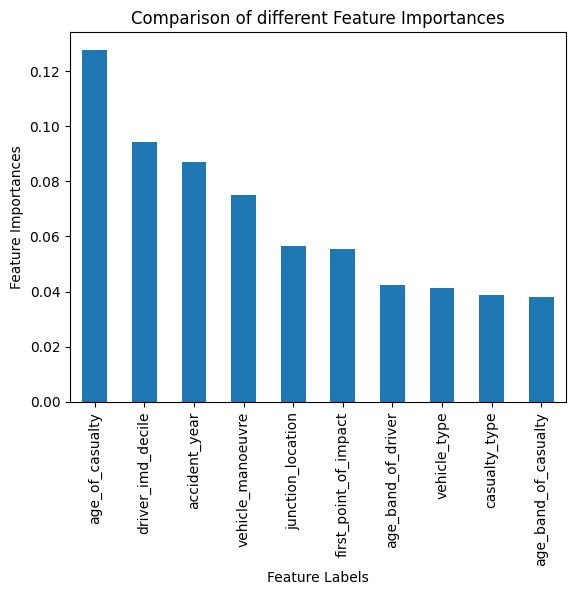

In [23]:
feat_importances = pd.Series(extra_tree_forest.feature_importances_, index=X_final.columns)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
feat_importances.nlargest(10).plot.bar()
plt.show()

In [24]:
best_selected_features = feat_importances.nlargest(10).keys().to_list()

In [25]:
best_selected_features     

['age_of_casualty',
 'driver_imd_decile',
 'accident_year',
 'vehicle_manoeuvre',
 'junction_location',
 'first_point_of_impact',
 'age_band_of_driver',
 'vehicle_type',
 'casualty_type',
 'age_band_of_casualty']

### Using best selected features 

In [26]:
X_col = X_final.columns

In [27]:
drop_feature_list = []

for col_val in X_col:
    if col_val not in best_selected_features:
        drop_feature_list.append(col_val)

In [28]:
drop_feature_list

['driver_home_area_type',
 'hit_object_in_carriageway',
 'hit_object_off_carriageway',
 'journey_purpose_of_driver',
 'sex_of_driver',
 'skidding_and_overturning',
 'towing_and_articulation',
 'vehicle_leaving_carriageway',
 'vehicle_location_restricted_lane',
 'vehicle_reference',
 'vehicle_left_hand_drive',
 'casualty_reference',
 'casualty_class',
 'sex_of_casualty',
 'pedestrian_location',
 'pedestrian_movement',
 'car_passenger',
 'bus_or_coach_passenger',
 'pedestrian_road_maintenance_worker',
 'casualty_home_area_type']

In [29]:
X_final = X_final.drop(drop_feature_list, axis=1)
X_final.shape

(2090929, 10)

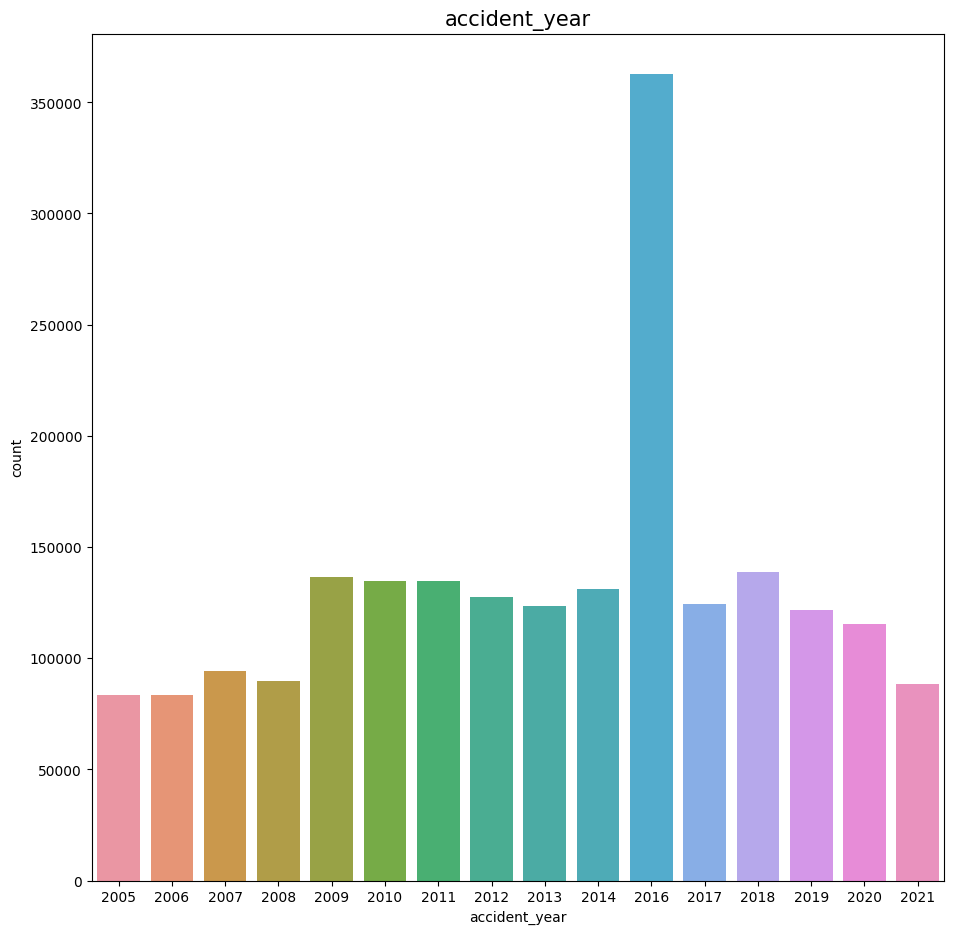

In [62]:
plt.figure(figsize=(11,11))
ax = sns.countplot(x = "accident_year" , data= X_final)
ax.set_title('accident_year', size = 15)
plt.savefig('accident_year.png')

## splitting the data

In [30]:
# Split the 'features' and 'income' data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, test_size = 0.2, random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1672743 samples.
Testing set has 418186 samples.


## Model Applying

In [31]:
target_severity = ["Fatal","Serious","Slight"]

In [32]:
#final result df
col_val = ["Classifiers_name","Training Acc","Test acc", "Log Loss", "precision", "Recall", "F1 Score","False Positive Rate", "Error Rate"]
Performance_df = pd.DataFrame(columns = col_val)

In [33]:
def plot_conf_matrix(cm):
    # Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
    cm_df = pd.DataFrame(cm,index = ['Fatal', 'Serious', 'Slight'], 
                         columns = ['Fatal', 'Serious', 'Slight'])
    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

In [34]:
##https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
def plot_auc_roc_curve(classifier, X_train, y_train, X_test, y_test,target_severity):
    label_binarizer = LabelBinarizer().fit(y_train)
    y_onehot_test = label_binarizer.transform(y_test)
    y_onehot_test.shape  # (n_samples, n_classes)
    n_classes = len(np.unique(Y_final))
    y_score = classifier.predict_proba(X_test)
    
    fig, ax = plt.subplots(figsize=(6, 6))

    colors = cycle(["aqua", "orange", "green"])
    for class_id, color in zip(range(n_classes), colors):
        RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            y_score[:, class_id],
            name=f"ROC curve for {target_severity [class_id]}",
            color=color,
            ax=ax,
        )

    plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic for multiclass")
    plt.legend()
    plt.show()

In [35]:
def model_applying(classifier, X_train, y_train, X_test, y_test,target_severity,Performance_df,clf_name):
    classifier.fit(X_train, y_train)
    
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)
    
    acc1 = metrics.accuracy_score(y_train, y_pred_train)
    acc2 = metrics.accuracy_score(y_test, y_pred_test)
    
    test_probability = classifier.predict_proba(X_test)
    logloss = log_loss(y_test, test_probability)
    
    report_df = pd.DataFrame(classification_report(y_test, y_pred_test, target_names=target_severity,output_dict=True)).transpose()
    
    precision = report_df["precision"]["macro avg"]
    recall = report_df["recall"]["macro avg"]
    f1_score = report_df["f1-score"]["macro avg"]
    
    cm = confusion_matrix(y_test, y_pred_test)
    #FPR and Error Rate setup
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    FPR = FP /(TN + FP)
    error_rate = 1-acc2
    
    
    print("Training Accuracy: {:.4%}".format(acc1))
    print(classification_report(y_train, y_pred_train, target_names=target_severity ))
    print("Test Accuracy: {:.4%}".format(acc2))
    print(classification_report(y_test, y_pred_test, target_names=target_severity ))
    plot_conf_matrix(cm)
    plot_auc_roc_curve(classifier, X_train, y_train, X_test, y_test,target_severity)
          
          
    result_values = pd.DataFrame([[clf_name, round(acc1*100,3),round(acc2*100,3), round(logloss*100,3),round(precision*100,3), 
                               round(recall*100,3), round(f1_score*100,3) , round(FPR*100,3),
                               round(error_rate*100,3),]], columns= col_val)
    Performance_df = Performance_df.append(result_values)
    return Performance_df

## 1. applying Random Forest

In [36]:
clf_name = 'Random Forest'
clf1 = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=42, max_depth=10)

-------------------- Random Forest Classifier --------------------
Training Accuracy: 86.0874%
              precision    recall  f1-score   support

       Fatal       0.67      0.00      0.00     18458
     Serious       0.56      0.01      0.02    215237
      Slight       0.86      1.00      0.93   1439048

    accuracy                           0.86   1672743
   macro avg       0.70      0.34      0.32   1672743
weighted avg       0.82      0.86      0.80   1672743

Test Accuracy: 86.0165%
              precision    recall  f1-score   support

       Fatal       0.57      0.00      0.00      4591
     Serious       0.53      0.01      0.02     54051
      Slight       0.86      1.00      0.92    359544

    accuracy                           0.86    418186
   macro avg       0.65      0.34      0.32    418186
weighted avg       0.82      0.86      0.80    418186



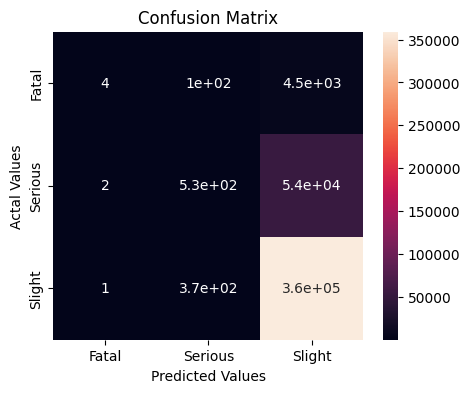

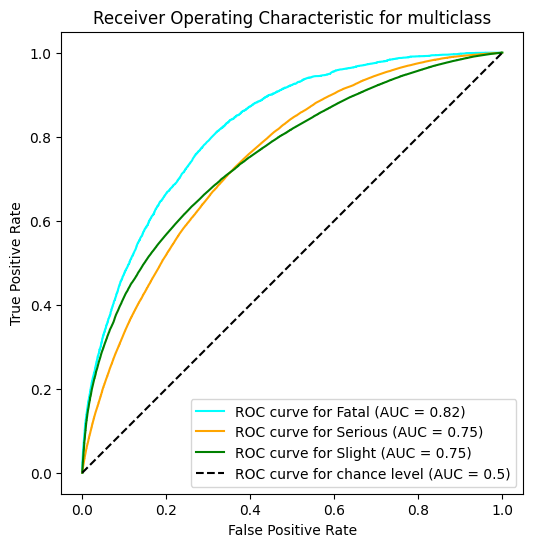

In [37]:
print("-"*20+" Random Forest Classifier "+"-"*20)
Performance_df = model_applying(clf1, X_train, y_train, X_test, y_test,target_severity,Performance_df,clf_name)

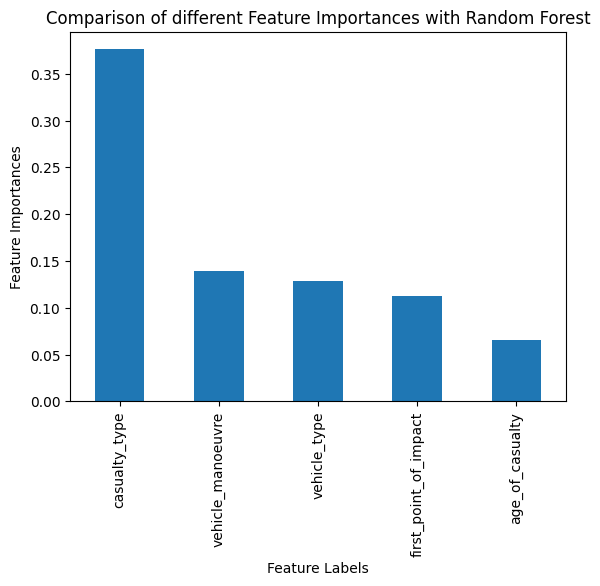

In [38]:
feat_importances1 = pd.Series(clf1.feature_importances_, index=X_final.columns)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances with Random Forest')
feat_importances1.nlargest().plot.bar()
plt.show()

In [39]:
Performance_df

,Classifiers_name,Training Acc,Test acc,Log Loss,precision,Recall,F1 Score,False Positive Rate,Error Rate
0,Random Forest,86.087,86.017,38.837,65.442,33.657,31.532,96.154,13.983


In [40]:
Performance_df.to_csv("Performance_df.csv", index= False)

## 2. Applying XGBoost 

In [41]:
clf_name = 'XGBoost'
clf2 = XGBClassifier(learning_rate=0.05, random_state = 0)

In [42]:
Performance_df = pd.read_csv("Performance_df.csv")

-------------------- XGBoost Classifier --------------------
Training Accuracy: 86.1027%
              precision    recall  f1-score   support

       Fatal       0.50      0.00      0.01     18458
     Serious       0.51      0.02      0.04    215237
      Slight       0.86      1.00      0.93   1439048

    accuracy                           0.86   1672743
   macro avg       0.63      0.34      0.33   1672743
weighted avg       0.81      0.86      0.80   1672743

Test Accuracy: 86.0347%
              precision    recall  f1-score   support

       Fatal       0.35      0.00      0.01      4591
     Serious       0.50      0.02      0.04     54051
      Slight       0.86      1.00      0.93    359544

    accuracy                           0.86    418186
   macro avg       0.57      0.34      0.32    418186
weighted avg       0.81      0.86      0.80    418186



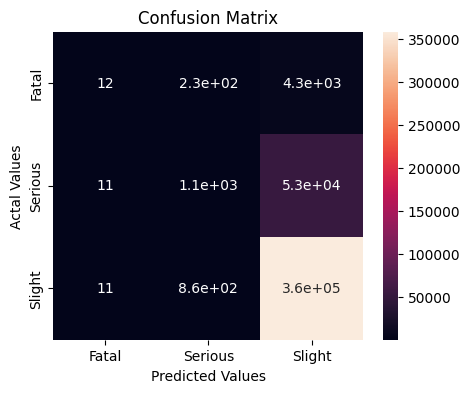

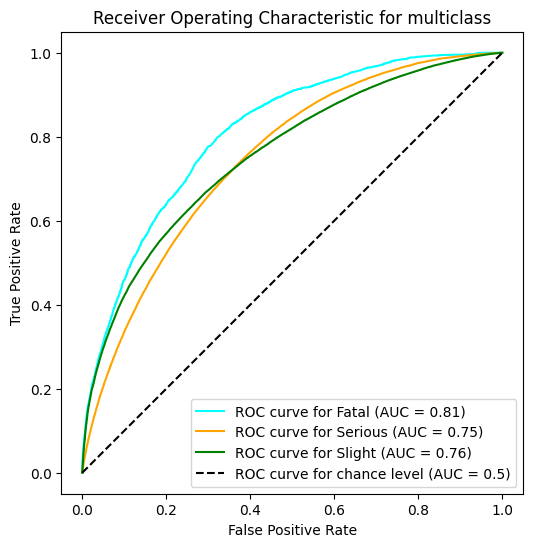

In [43]:
print("-"*20+" XGBoost Classifier "+"-"*20)
le = LabelEncoder()
y_train1 = le.fit_transform(y_train)
y_test1 = le.fit_transform(y_test)
Performance_df = model_applying(clf2, X_train, y_train1, X_test, y_test1, target_severity, Performance_df,clf_name)

In [44]:
Performance_df

,Classifiers_name,Training Acc,Test acc,Log Loss,precision,Recall,F1 Score,False Positive Rate,Error Rate
0,Random Forest,86.087,86.017,38.837,65.442,33.657,31.532,96.154,13.983
0,XGBoost,86.103,86.035,39.287,57.235,34.021,32.316,95.082,13.965


In [45]:
Performance_df.to_csv("Performance_df.csv", index= False)

## 3. Applying K-Nearest neighbours

In [46]:
clf_name = ' KNeighborsClassifier'
clf3 = KNeighborsClassifier(algorithm='auto', metric='minkowski')  

In [47]:
Performance_df = pd.read_csv("Performance_df.csv")

-------------------- K-Nearest neighbours --------------------
Training Accuracy: 87.5137%
              precision    recall  f1-score   support

       Fatal       0.43      0.14      0.21     18458
     Serious       0.61      0.27      0.37    215237
      Slight       0.89      0.98      0.93   1439048

    accuracy                           0.88   1672743
   macro avg       0.64      0.46      0.50   1672743
weighted avg       0.85      0.88      0.85   1672743

Test Accuracy: 84.1336%
              precision    recall  f1-score   support

       Fatal       0.10      0.03      0.05      4591
     Serious       0.33      0.14      0.20     54051
      Slight       0.87      0.96      0.91    359544

    accuracy                           0.84    418186
   macro avg       0.44      0.38      0.39    418186
weighted avg       0.80      0.84      0.81    418186



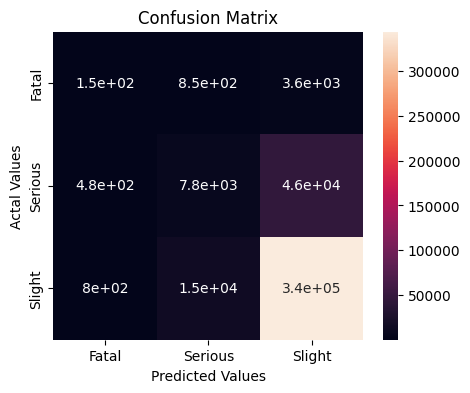

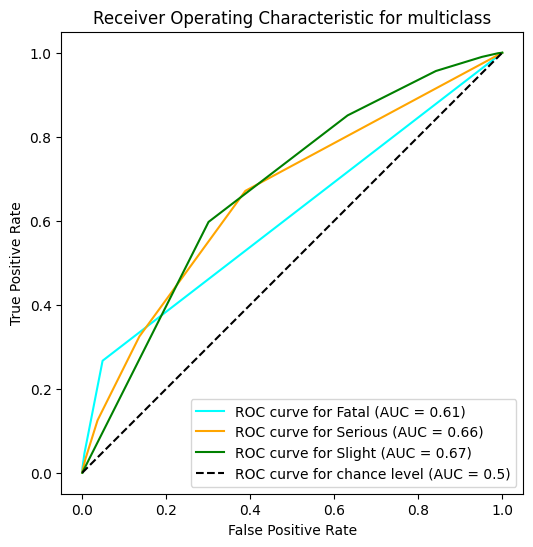

In [48]:
print("-"*20+" K-Nearest neighbours "+"-"*20)
Performance_df = model_applying(clf3, X_train, y_train, X_test, y_test,target_severity,Performance_df,clf_name)

In [49]:
Performance_df

,Classifiers_name,Training Acc,Test acc,Log Loss,precision,Recall,F1 Score,False Positive Rate,Error Rate
0,Random Forest,86.087,86.017,38.837,65.442,33.657,31.532,96.154,13.983
1,XGBoost,86.103,86.035,39.287,57.235,34.021,32.316,95.082,13.965
0,KNeighborsClassifier,87.514,84.134,209.801,43.627,37.747,38.771,85.400,15.866


In [50]:
Performance_df.to_csv("Performance_df.csv", index= False)

## 4. Applying AdaBoostClassifier

In [51]:
clf_name = 'AdaBoost'
clf4 = AdaBoostClassifier( n_estimators=100, learning_rate=0.05, random_state=42)

In [52]:
Performance_df = pd.read_csv("Performance_df.csv")  

-------------------- Adaboost Classifier --------------------
Training Accuracy: 86.0292%
              precision    recall  f1-score   support

       Fatal       0.00      0.00      0.00     18458
     Serious       0.00      0.00      0.00    215237
      Slight       0.86      1.00      0.92   1439048

    accuracy                           0.86   1672743
   macro avg       0.29      0.33      0.31   1672743
weighted avg       0.74      0.86      0.80   1672743

Test Accuracy: 85.9771%
              precision    recall  f1-score   support

       Fatal       0.00      0.00      0.00      4591
     Serious       0.00      0.00      0.00     54051
      Slight       0.86      1.00      0.92    359544

    accuracy                           0.86    418186
   macro avg       0.29      0.33      0.31    418186
weighted avg       0.74      0.86      0.79    418186



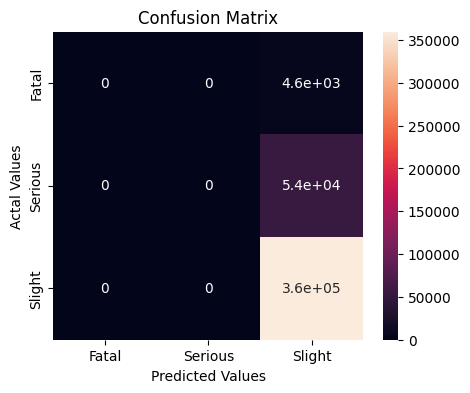

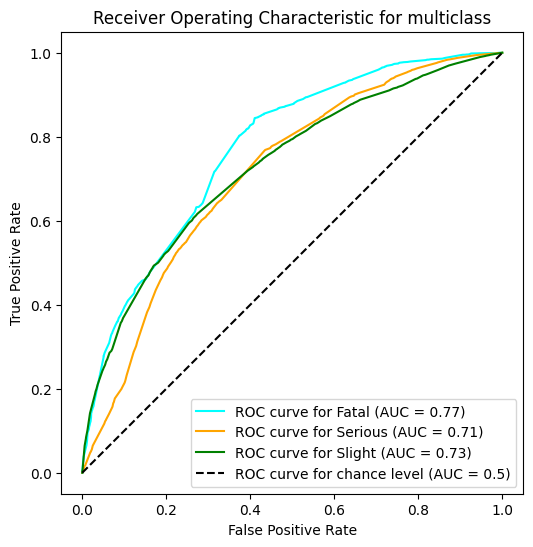

In [53]:
print("-"*20+" Adaboost Classifier "+"-"*20)
Performance_df = model_applying(clf4, X_train, y_train, X_test, y_test,target_severity,Performance_df,clf_name)

In [54]:
Performance_df

,Classifiers_name,Training Acc,Test acc,Log Loss,precision,Recall,F1 Score,False Positive Rate,Error Rate
0,Random Forest,86.087,86.017,38.837,65.442,33.657,31.532,96.154,13.983
1,XGBoost,86.103,86.035,39.287,57.235,34.021,32.316,95.082,13.965
2,KNeighborsClassifier,87.514,84.134,209.801,43.627,37.747,38.771,85.400,15.866
0,AdaBoost,86.029,85.977,77.803,28.659,33.333,30.820,NaN,14.023


In [55]:
Performance_df.to_csv("Performance_df.csv", index= False)

## 5. Applying Bagging Classifier

In [56]:
clf_name = 'Bagging Classifier'
clf5 = BaggingClassifier(max_features=X_train.shape[1], n_estimators=100, random_state=42)

In [57]:
Performance_df = pd.read_csv("Performance_df.csv")

-------------------- Bagging Classifier --------------------
Training Accuracy: 95.4596%
              precision    recall  f1-score   support

       Fatal       0.95      0.67      0.79     18458
     Serious       0.94      0.72      0.82    215237
      Slight       0.96      0.99      0.97   1439048

    accuracy                           0.95   1672743
   macro avg       0.95      0.80      0.86   1672743
weighted avg       0.95      0.95      0.95   1672743

Test Accuracy: 84.7788%
              precision    recall  f1-score   support

       Fatal       0.27      0.09      0.13      4591
     Serious       0.40      0.20      0.27     54051
      Slight       0.88      0.95      0.92    359544

    accuracy                           0.85    418186
   macro avg       0.52      0.41      0.44    418186
weighted avg       0.81      0.85      0.82    418186



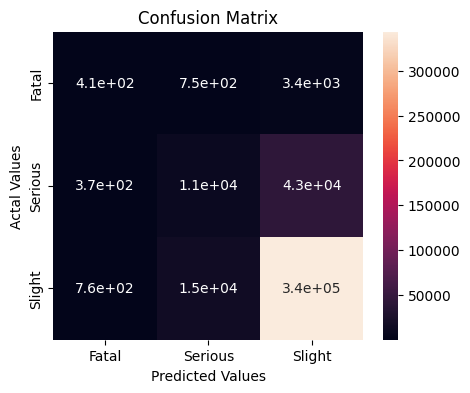

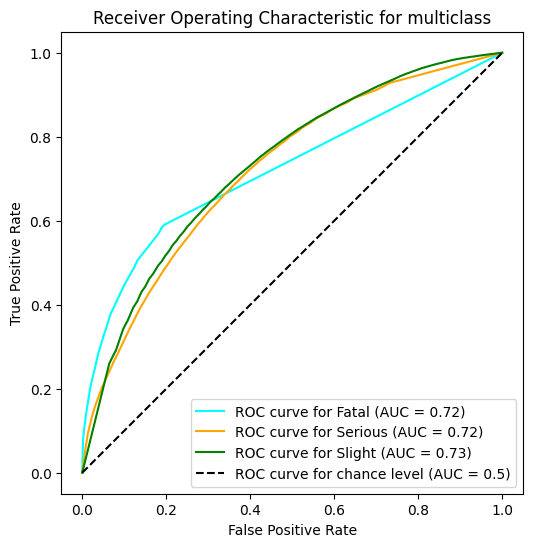

In [58]:
print("-"*20+" Bagging Classifier "+"-"*20)
Performance_df = model_applying(clf5, X_train, y_train, X_test, y_test,target_severity,Performance_df,clf_name)

In [59]:
Performance_df

,Classifiers_name,Training Acc,Test acc,Log Loss,precision,Recall,F1 Score,False Positive Rate,Error Rate
0,Random Forest,86.087,86.017,38.837,65.442,33.657,31.532,96.154,13.983
1,XGBoost,86.103,86.035,39.287,57.235,34.021,32.316,95.082,13.965
2,KNeighborsClassifier,87.514,84.134,209.801,43.627,37.747,38.771,85.400,15.866
3,AdaBoost,86.029,85.977,77.803,28.659,33.333,30.820,NaN,14.023
0,Bagging Classifier,95.460,84.779,86.040,51.602,41.498,43.930,64.610,15.221


In [60]:
Performance_df.to_csv("Performance_df.csv", index= False)

In [61]:
Performance_df

,Classifiers_name,Training Acc,Test acc,Log Loss,precision,Recall,F1 Score,False Positive Rate,Error Rate
0,Random Forest,86.087,86.017,38.837,65.442,33.657,31.532,96.154,13.983
1,XGBoost,86.103,86.035,39.287,57.235,34.021,32.316,95.082,13.965
2,KNeighborsClassifier,87.514,84.134,209.801,43.627,37.747,38.771,85.400,15.866
3,AdaBoost,86.029,85.977,77.803,28.659,33.333,30.820,NaN,14.023
0,Bagging Classifier,95.460,84.779,86.040,51.602,41.498,43.930,64.610,15.221
